In [61]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [104]:
df_amount = pd.read_csv("Medibuddy insurance data_amount_claimed.csv")
df_personal = pd.read_csv("Medibuddy personal data.csv")

In [105]:
df_amount

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19.0,female,27.900,16884.92400
1,PLC156907,18.0,male,33.770,1725.55230
2,PLC156916,28.0,male,33.000,4449.46200
3,PLC156925,33.0,male,22.705,21984.47061
4,PLC156934,32.0,male,28.880,3866.85520
...,...,...,...,...,...
1333,PLC168895,50.0,male,30.970,10600.54830
1334,PLC168904,18.0,female,31.920,2205.98080
1335,PLC168913,18.0,female,36.850,1629.83350
1336,PLC168922,21.0,female,25.800,2007.94500


In [106]:
df_personal

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
...,...,...,...,...
1333,PLC168400,1,yes,northeast
1334,PLC168436,0,yes,northeast
1335,PLC168634,2,yes,northeast
1336,PLC168652,0,yes,northeast


In [107]:
df = pd.merge(df_amount,df_personal,how = "inner",on = "Policy no.")

<Axes: >

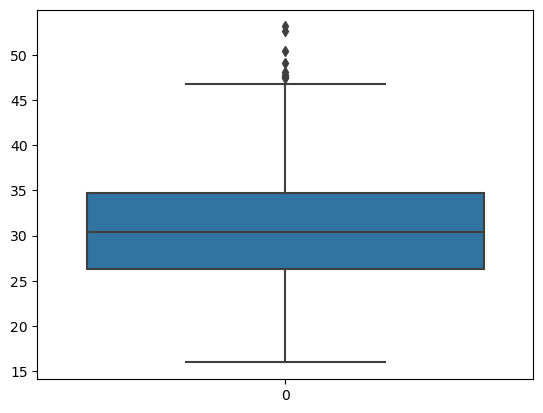

In [108]:
sns.boxplot(df["bmi"])

In [109]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
IQR = q3-q1
lower = q1-1.5*IQR
upper = q3+ 1.5*IQR

In [110]:
df = df[(df["bmi"] >= lower) & (df["bmi"] <= upper)]

In [111]:
df

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19.0,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18.0,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28.0,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33.0,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32.0,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...,...
1333,PLC168895,50.0,male,30.970,10600.54830,3,no,northwest
1334,PLC168904,18.0,female,31.920,2205.98080,0,no,northeast
1335,PLC168913,18.0,female,36.850,1629.83350,0,no,southeast
1336,PLC168922,21.0,female,25.800,2007.94500,0,no,southwest


In [112]:
df.duplicated().sum()

0

In [113]:
df.isnull().sum()

Policy no.         0
age                6
sex                0
bmi                0
charges in INR    15
children           0
smoker             0
region             0
dtype: int64

In [114]:
df = df.dropna()

In [115]:
df.isnull().sum()

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
children          0
smoker            0
region            0
dtype: int64

In [116]:
df.drop(columns = ["Policy no."],inplace = True)

In [117]:
df

,age,sex,bmi,charges in INR,children,smoker,region
0,19.0,female,27.900,16884.92400,0,yes,southwest
1,18.0,male,33.770,1725.55230,1,no,southeast
2,28.0,male,33.000,4449.46200,3,no,southeast
3,33.0,male,22.705,21984.47061,0,no,northwest
4,32.0,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,10600.54830,3,no,northwest
1334,18.0,female,31.920,2205.98080,0,no,northeast
1335,18.0,female,36.850,1629.83350,0,no,southeast
1336,21.0,female,25.800,2007.94500,0,no,southwest


In [118]:
df = pd.get_dummies(df,columns = ["sex","smoker","region"],drop_first = True,dtype = float)

In [119]:
df

,age,bmi,charges in INR,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,16884.92400,0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1725.55230,1,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,4449.46200,3,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,21984.47061,0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,3866.85520,0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,10600.54830,3,1.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,2205.98080,0,0.0,0.0,0.0,0.0,0.0
1335,18.0,36.850,1629.83350,0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,2007.94500,0,0.0,0.0,0.0,0.0,1.0


In [120]:
df.columns

Index(['age', 'bmi', 'charges in INR', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [121]:
X = df[['age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest']]

In [122]:
y = df[['charges in INR']]

In [123]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3,1.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0,0.0,0.0,0.0,0.0,0.0
1335,18.0,36.850,0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0,0.0,0.0,0.0,0.0,1.0


In [124]:
y

,charges in INR
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [129]:
model = LinearRegression()

In [130]:
model.fit(X_train,y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)

In [132]:
y_test

,charges in INR
491,24513.09126
743,3757.84480
322,35491.64000
680,2585.26900
848,2974.12600
...,...
315,9722.76950
204,7147.10500
305,19442.35350
295,1704.56810


In [133]:
mse = mean_squared_error(y_test,y_pred)

In [134]:
print(f"Mean squared error: {mse}")

Mean squared error: 34043929.16010485


In [135]:
r2 = r2_score(y_test,y_pred)

In [136]:
print(f"r2 score is: {r2}")

r2 score is: 0.7883264642296919
